    Ano de fundação
    em que estágio ela está
    se tem internacionalização 
    e se já teve algum tipo de financiamento

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.cluster.hierarchy as sch

from category_encoders.one_hot import OneHotEncoder
from sklearn.decomposition import KernelPCA, PCA, TruncatedSVD
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

In [ ]:
%matplotlib inline
sns.set()

In [ ]:
df = pd.read_csv('statup.csv')

In [ ]:
selected_cols1 = ['Ano de Fundação', 'Momento da Startup', 'Negocio no exterior', 'Capitação de recursos']
selected_cols2 = ['Ano de Fundação', 'Momento da Startup', 'Tamanho da equipe', 'Area atuação', 'Negocio no exterior', 'Capitação de recursos', 'Porte', 'Público']

In [ ]:
df.sample(5)

,Startup,Ano de Fundação,Estado,Momento da Startup,Tamanho da equipe,Area atuação,Público alvo,Produto,Negocio no exterior,Capitação de recursos,Porte,Público,Descrição
7946,Swisscam,2005,AC,Tração,7-11 pessoas,Mobtech,P2P,ferramenta para visualização de dados,sim,sim,Internacional,Fechado,"Clube de networking, negócios e economia entre..."
9400,Lide,2002,ES,Ideação,7-11 pessoas,Legaltech,B2C,classificador de tumor,não,não,Nacional,Fechado,Rede de networking e relações profissionais en...
1751,BNA group,2005,AL,Escala,4-6 pessoas,Mobiletech,P2P,classificador de tumor,sim,não,Multinacional,Aberto,"empreendimento, vínculo com Itaú"
958,ABF,2018,PA,Tração,12 pessoas,Logtech,B2B2C,ferramenta para visualização de dados,não,não,Multinacional,Fechado,Lions Clube com sócios de várias nacionalidade...
498,Câmara Espanhola,1994,GO,Ideação,12 pessoas,Agtech,P2P,Serviços de data science,não,sim,Multinacional,Empresas/Pessoa física,negócios Brasil - França


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Startup                10000 non-null  object
 1   Ano de Fundação        10000 non-null  int64 
 2   Estado                 10000 non-null  object
 3   Momento da Startup     10000 non-null  object
 4   Tamanho da equipe      10000 non-null  object
 5   Area atuação           10000 non-null  object
 6   Público alvo           10000 non-null  object
 7   Produto                10000 non-null  object
 8   Negocio no exterior    10000 non-null  object
 9   Capitação de recursos  10000 non-null  object
 10  Porte                  10000 non-null  object
 11  Público                10000 non-null  object
 12  Descrição              9770 non-null   object
dtypes: int64(1), object(12)
memory usage: 1015.8+ KB


In [ ]:
cols = df.columns
for col in cols:
    print(f'<><><><><><><><><><><><><><>{col}<><><><><><><><><><><><><><><><<>')
    print(df[col].value_counts(normalize=True))
    print(f'<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><<>\n\n')

<><><><><><><><><><><><><><>Startup<><><><><><><><><><><><><><><><<>
Dubai Chamber                             0.0242
Meepe                                     0.0235
EBS Buyer's Club                          0.0233
BNI Brasil                                0.0228
Cubo Itaú                                 0.0220
ICC World                                 0.0217
Amcham Mundo                              0.0216
Brown's Club                              0.0215
ICC Brazil                                0.0215
WTC                                       0.0214
Clube do Networking                       0.0212
Quemfornece.com                           0.0212
FSB Club                                  0.0210
WTC Curitiba                              0.0209
ABAG                                      0.0209
ABIT                                      0.0208
Experience Club                           0.0208
Rotaract Club Europe                      0.0207
CSR Europe                                0.0207


### Feature Engineering

In [ ]:
data = df[selected_cols1].copy()
data1 = df[selected_cols2].copy()

### Variáveis Quantitativas

In [ ]:
scaler = MinMaxScaler()
scaler.fit(data1['Ano de Fundação'].values.reshape(-1, 1))

data1['Ano de Fundação'] = scaler.transform(data1['Ano de Fundação'].values.reshape(-1, 1))

### Variáveis Qualitativas

In [ ]:
data1['Negocio no exterior'] = data1['Negocio no exterior'].map({'sim': 1, 'não': 0})
data1['Capitação de recursos'] = data1['Capitação de recursos'].map({'sim': 1, 'não': 0})

In [ ]:
encoder = OneHotEncoder(use_cat_names=True)
encoder.fit(data1.select_dtypes(include=np.object))
data_encoder = encoder.transform(data1.select_dtypes(include=np.object))

In [ ]:
preprocessed = pd.concat([data1.select_dtypes(include=np.number), data_encoder], axis=1).reset_index(drop=True)

In [ ]:
preprocessed

,Ano de Fundação,Negocio no exterior,Capitação de recursos,Momento da Startup_Validação,Momento da Startup_Escala,Momento da Startup_Ideação,Momento da Startup_Operação,Momento da Startup_Tração,Tamanho da equipe_12 pessoas,Tamanho da equipe_1-3 pessoas,...,Porte_Nacional,Porte_Multinacional,Público_Empresas/Pessoa física,Público_fechado,Público_Fechado,Público_Pessoa física,Público_Fechado,Público_Aberto,Público_Empresas,Público_aberto
0,0.185185,1,1,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0.777778,0,1,0,1,0,0,0,0,1,...,1,0,0,1,0,0,0,0,0,0
2,0.333333,1,0,1,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
3,0.851852,0,1,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
4,0.074074,1,1,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.814815,0,1,0,0,0,0,1,0,1,...,0,1,0,0,0,1,0,0,0,0
9996,1.000000,1,1,1,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
9997,0.000000,1,0,1,0,0,0,0,0,1,...,1,0,0,1,0,0,0,0,0,0
9998,0.629630,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


## Construção do modelo: Não-supervicionado

## K-Means

### Encontrar o número ótimo de K-clusters (Elbow Method)

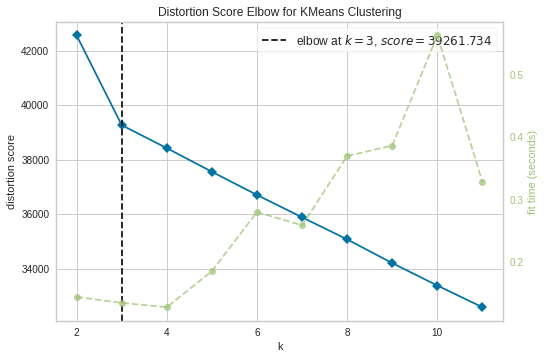

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12))

visualizer.fit(preprocessed)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(preprocessed)

KMeans(n_clusters=3, random_state=42)

In [ ]:
preprocessed['Target_kmeans'] = kmeans.labels_

#### Visualizando os clusters

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(preprocessed)

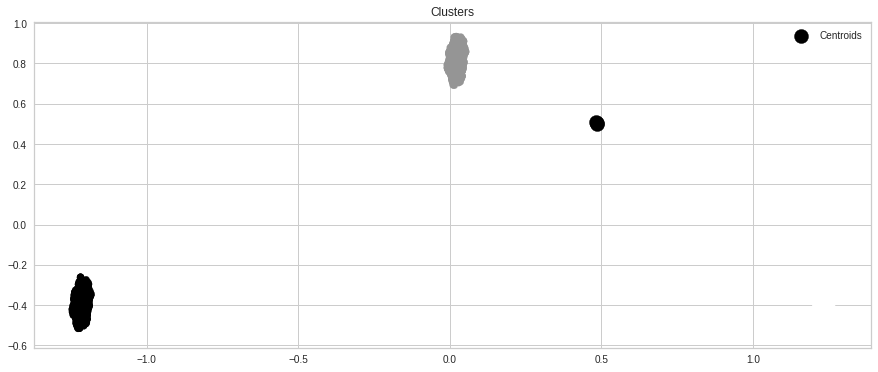

In [ ]:
plt.figure(figsize=(15, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, color='black', label='Centroids')
plt.title('Clusters')
plt.legend()
plt.show()

## DBSCAN

In [ ]:
dbscan = DBSCAN(eps=.3, min_samples=2)
dbscan.fit(preprocessed)

DBSCAN(eps=0.3, min_samples=2)

In [ ]:
preprocessed['Target_dbscan'] = dbscan.labels_

In [ ]:
pca = PCA(n_components=2)
X_pca_db = pca.fit_transform(preprocessed)

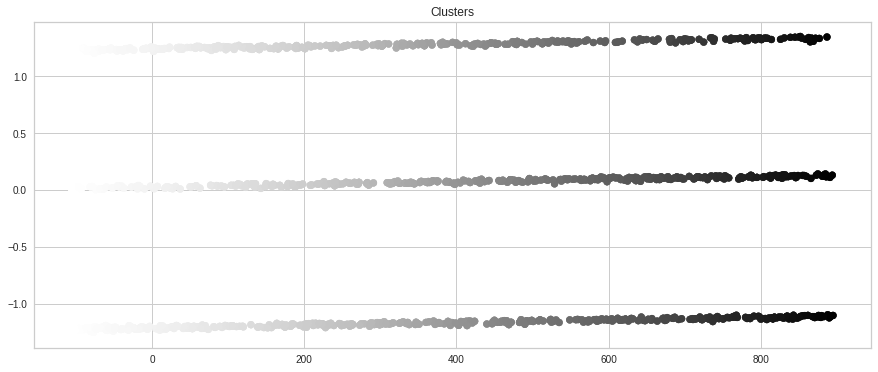

In [ ]:
plt.figure(figsize=(15, 6))
plt.scatter(X_pca_db[:, 0], X_pca_db[:, 1], c=dbscan.labels_)
plt.title('Clusters')
plt.show()

### AgglomerativeClustering

#### Dendograma

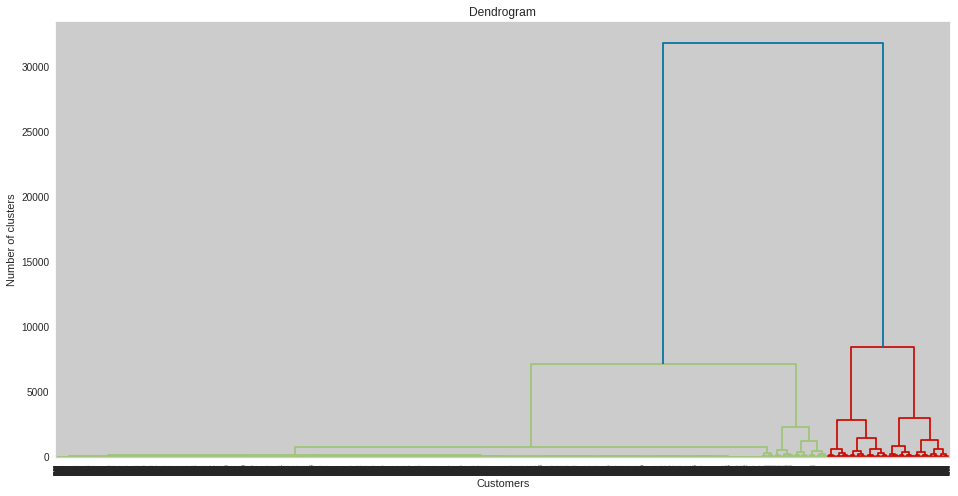

In [ ]:
fig = plt.figure(figsize=(16, 8))
dendrogram = sch.dendrogram(sch.linkage(preprocessed, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Number of clusters')
plt.show()

In [ ]:
agg = AgglomerativeClustering(n_clusters=3)
agg.fit(preprocessed)

AgglomerativeClustering(n_clusters=3)

In [ ]:
preprocessed['Target_agg'] = agg.labels_

In [ ]:
pca = PCA(n_components=2)
X_pca_agg = pca.fit_transform(preprocessed)

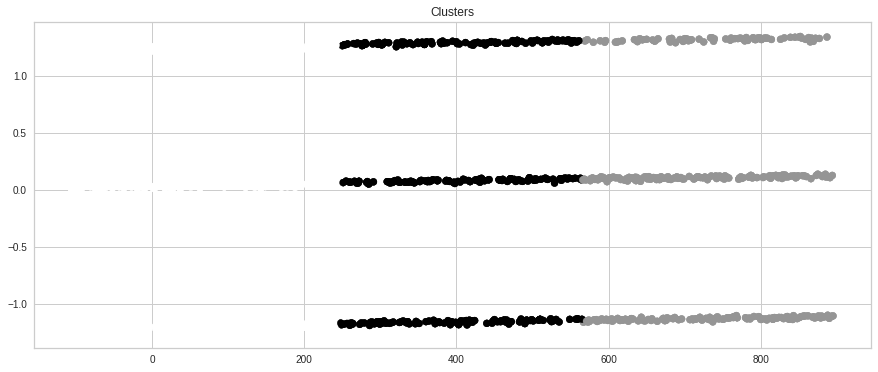

In [ ]:
plt.figure(figsize=(15, 6))
plt.scatter(X_pca_agg[:, 0], X_pca_agg[:, 1], c=agg.labels_)
plt.title('Clusters')
plt.show()